# Python for Scientific Computing

## Overview

Python is extremely popular for scientific computing, due to such factors as

- the accessible and flexible nature of the language itself,  
- the huge range of high quality scientific libraries now available,  
- the fact that the language and libraries are open source,  
- the popular Anaconda Python distribution, which simplifies installation and
  management of those libraries, and  
- the recent surge of interest in using Python for machine learning and
  artificial intelligence.  


In this lecture we give a short overview of scientific computing in Python,
addressing the following questions:

- What are the relative strengths and weaknesses of Python for these tasks?  
- What are the main elements of the scientific Python ecosystem?  
- How is the situation changing over time?  


## Scientific Libraries

Let’s briefly review Python’s scientific libraries, starting with why we need
them.

### The Role of Scientific Libraries

1. It is almost always better to use an existing routine for root finding than to write a new one from scratch.

1. Pure Python, while flexible and elegant, is not fast. So we need libraries that are designed to accelerate execution of Python code.


### Python’s Scientific Ecosystem

In terms of popularity, the big four in the world of scientific Python
libraries are

- NumPy  
- SciPy  
- Matplotlib  
- Pandas  


For our purpose, there’s another (relatively new) library that is essential for numerical computing:

- Numba  

But first, let’s quickly review how they fit together.

- NumPy forms the foundations by providing a basic array data type (think of
  vectors and matrices) and functions for acting on these arrays (e.g., matrix
  multiplication).  
- SciPy builds on NumPy by adding the kinds of numerical methods that are
  routinely used in science (interpolation, optimization, root finding, etc.).  
- Matplotlib is used to generate figures, with a focus on plotting data stored in NumPy arrays.
- Pandas provides types and functions for empirical work (e.g., manipulating data).  
- Numba accelerates execution via JIT compilation — we already discussed this in the previous lecture.

# NumPy


<a id='index-1'></a>

[NumPy](http://docs.scipy.org/doc/numpy/reference/) is a first-rate library for numerical programming.

- Widely used in academia, finance and industry.  
- Mature, fast, stable and under continuous development.  

In this lecture, we will start a more systematic discussion of both

- NumPy arrays and
- the fundamental array processing operations provided by NumPy.  

## NumPy Arrays


<a id='index-2'></a>
The essential problem that NumPy solves is fast array processing.

The most important structure that NumPy defines is an array data type formally called a [numpy.ndarray](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html).

NumPy arrays power a large proportion of the scientific Python ecosystem.

Let’s first import the library.

In [1]:
import numpy as np

To create a NumPy array containing only zeros we use  [np.zeros](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html#numpy.zeros)

In [2]:
a = np.zeros(3)
a

array([0., 0., 0.])

In [3]:
type(a)

numpy.ndarray

NumPy arrays are somewhat like native Python lists, except that

- Data *must be homogeneous* (all elements of the same type).  
- These types must be one of the [data types](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) (`dtypes`) provided by NumPy.  


The most important of these dtypes are:

- float64: 64 bit floating-point number  
- int64: 64 bit integer  
- bool:  8 bit True or False  


There are also dtypes to represent complex numbers, unsigned integers, etc.

On modern machines, the default dtype for arrays is `float64`

In [4]:
a = np.zeros(3)
type(a[0])

numpy.float64

If we want to use integers we can specify as follows:

In [5]:
a = np.zeros(3, dtype=int)
type(a[0])

numpy.int64


<a id='numpy-shape-dim'></a>

### Shape and Dimension


<a id='index-3'></a>
Consider the following assignment

In [6]:
z = np.zeros(10)
z

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Here `z` is a *flat* array with no dimension — neither row nor column vector.

The dimension is recorded in the `shape` attribute, which is a tuple

In [7]:
z.shape

(10,)

Here the shape tuple has only one element, which is the length of the array (tuples with one element end with a comma).

To give it dimension, we can change the `shape` attribute

In [8]:
z.shape = (10, 1)
z

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

To make the 2 by 2 array filled with 0's, we could also pass a tuple to the `zeros()` function, as in `z = np.zeros((2, 2))` or `z = np.zeros([2, 2])`.


In [9]:
z = np.zeros([2,2])
z

array([[0., 0.],
       [0., 0.]])

### Creating Arrays


<a id='index-4'></a>
As we’ve seen, the `np.zeros` function creates an array of zeros.

You can probably guess what `np.ones` creates.

Related is `np.empty`, which creates arrays in memory that can later be populated with data

In [10]:
z = np.empty(3)
z

array([0., 0., 0.])

The numbers you see here are garbage values.

(Python allocates 3 contiguous 64 bit pieces of memory, and the existing contents of those memory slots are interpreted as `float64` values)

To set up a grid of evenly spaced numbers use `np.linspace`

In [11]:
z = np.linspace(2, 4, 5)  # From 2 to 4, with 5 elements
z

array([2. , 2.5, 3. , 3.5, 4. ])

To create an identity matrix use either `np.identity` or `np.eye`

In [12]:
z = np.identity(2)
z = np.eye(2)
z

array([[1., 0.],
       [0., 1.]])

In addition, NumPy arrays can be created from Python lists, tuples, etc. using `np.array`

In [13]:
z = np.array([10, 20])                 # ndarray from Python list
z

array([10, 20])

In [14]:
type(z)

numpy.ndarray

In [15]:
z = np.array((10, 20), dtype=float)    # Here 'float' is equivalent to 'np.float64'
z

array([10., 20.])

In [16]:
z = np.array([[1, 2], [3, 4]])         # 2D array from a list of lists
z

array([[1, 2],
       [3, 4]])

To read in the array data from a text file containing numeric data use `np.loadtxt`
or `np.genfromtxt`—see [the documentation](http://docs.scipy.org/doc/numpy/reference/routines.io.html) for details.

### Array Indexing


<a id='index-5'></a>
For a flat array, indexing is the same as Python sequences:

In [17]:
z = np.linspace(1, 2, 5)
z

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

In [18]:
z[0]

1.0

In [19]:
z[0:2]  # Two elements, starting at element 0

array([1.  , 1.25])

In [20]:
z[-1]

2.0

For 2D arrays the index syntax is as follows:

In [21]:
z = np.array([[1, 2], [3, 4]])
z

array([[1, 2],
       [3, 4]])

In [22]:
z[0, 0]

1

In [23]:
z[0, 1]

2

And so on.

Note that indices are still zero-based, to maintain compatibility with Python sequences.

Columns and rows can be extracted as follows

In [24]:
z[0, :]

array([1, 2])

In [25]:
z[:, 1]

array([2, 4])

NumPy arrays of integers can also be used to extract elements

In [26]:
z = np.linspace(2, 4, 5)
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [27]:
indices = np.array((0, 2, 3))
z[indices]   # equivalent to z[[0,2,3]]

array([2. , 3. , 3.5])

Finally, an array of `dtype bool` can be used to extract elements

In [28]:
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [29]:
d = np.array([0, 1, 1, 0, 0], dtype=bool)
d

array([False,  True,  True, False, False])

In [30]:
z[d]

array([2.5, 3. ])

We’ll see why this is useful below.

An aside: all elements of an array can be set equal to one number using slice notation

In [31]:
z = np.empty(3)
z

array([2. , 3. , 3.5])

In [32]:
z[:] = 4
z

array([4., 4., 4.])

### Array Methods


<a id='index-6'></a>
Arrays have useful methods, all of which are carefully optimized

In [33]:
a = np.array((4, 2, 1, 3))
a

array([4, 2, 1, 3])

In [34]:
a.sort()              # Sorts a in place in ascending order 
a

array([1, 2, 3, 4])

In [35]:
a[::-1].sort()       # sort a in place in descending order
a

array([4, 3, 2, 1])

In [36]:
a.sum()               # Sum

10

In [37]:
a.mean()              # Mean

2.5

In [38]:
a.max()               # Max

4

In [39]:
a.argmax()            # Returns the index of the maximal element

0

In [40]:
a.cumsum()            # Cumulative sum of the elements of a

array([ 4,  7,  9, 10])

In [41]:
a.cumprod()           # Cumulative product of the elements of a

array([ 4, 12, 24, 24])

In [42]:
a.var()               # Variance

1.25

In [43]:
a.std()               # Standard deviation

1.118033988749895

In [44]:
a.shape = (2, 2)
a
a.T                   # Equivalent to a.transpose()

array([[4, 2],
       [3, 1]])

Another method worth knowing is `searchsorted()`.

If `z` is a nondecreasing array, then `z.searchsorted(a)` returns the index of the first element of `z` that is `>= a`

In [45]:
z = np.linspace(2, 4, 5)
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [46]:
z.searchsorted(1.)

0

Many of the methods discussed above have equivalent functions in the NumPy namespace

In [47]:
a = np.array((4, 3, 2, 1))

In [48]:
np.sum(a)

10

In [49]:
np.mean(a)

2.5

## Operations on Arrays


<a id='index-7'></a>

### Arithmetic Operations

The operators `+`, `-`, `*`, `/` and `**` all act *elementwise* on arrays

In [50]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
a + b

array([ 6,  8, 10, 12])

In [51]:
a * b

array([ 5, 12, 21, 32])

We can add a scalar to each element as follows

In [52]:
a + 10

array([11, 12, 13, 14])

Scalar multiplication is similar

In [53]:
a * 10

array([10, 20, 30, 40])

The two-dimensional arrays follow the same general rules

In [54]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A + B

array([[2., 2.],
       [2., 2.]])

In [55]:
A + 10

array([[11., 11.],
       [11., 11.]])

In [56]:
A * B

array([[1., 1.],
       [1., 1.]])


<a id='numpy-matrix-multiplication'></a>
In particular, `A * B` is *not* the matrix product, it is an element-wise product.

### Matrix Multiplication


<a id='index-8'></a>
With Anaconda’s scientific Python package based around Python 3.5 and above,
one can use the `@` symbol for matrix multiplication, as follows:

In [57]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A @ B

array([[2., 2.],
       [2., 2.]])

(For older versions of Python and NumPy you need to use the [np.dot](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) function)

We can also use `@` to take the inner product of two flat arrays

In [58]:
A = np.array((1, 2))
B = np.array((10, 20))
A @ B

50

In fact, we can use `@` when one element is a Python list or tuple

In [59]:
A = np.array(((1, 2), (3, 4)))
A

array([[1, 2],
       [3, 4]])

In [60]:
A @ (0, 1)

array([2, 4])

Since we are post-multiplying, the tuple is treated as a column vector.

### Mutability and Copying Arrays

NumPy arrays are mutable data types, like Python lists.

In other words, their contents can be altered (mutated) in memory after initialization.


In [61]:
a = np.array([42, 44])
a

array([42, 44])

In [62]:
a[-1] = 0  # Change last element to 0
a

array([42,  0])

Mutability leads to the following behavior (which can be shocking to MATLAB programmers…)

In [63]:
a = np.random.randn(3)
a

array([ 1.09878757, -0.05106945, -1.82001325])

In [64]:
b = a
b[0] = 0.0
a

array([ 0.        , -0.05106945, -1.82001325])

What’s happened is that we have changed `a` by changing `b`.

The name `b` is bound to `a` and becomes just another reference to the
array (the Python assignment model is described in more detail [later in the course](https://python-programming.quantecon.org/python_advanced_features.html)).

Hence, it has equal rights to make changes to that array.

This is in fact the most sensible default behavior!

It means that we pass around only pointers to data, rather than making copies.

Making copies is expensive in terms of both speed and memory.

#### Making Copies

It is of course possible to make `b` an independent copy of `a` when required.

This can be done using `np.copy`

In [65]:
a = np.random.randn(3)
a

array([-0.46234753, -0.02794185, -0.58255406])

In [66]:
b = np.copy(a)
b

array([-0.46234753, -0.02794185, -0.58255406])

Now `b` is an independent copy (called a *deep copy*)

In [67]:
b[:] = 1
b

array([1., 1., 1.])

In [68]:
a

array([-0.46234753, -0.02794185, -0.58255406])

Note that the change to `b` has not affected `a`.

## Additional Functionality

Let’s look at some other useful things we can do with NumPy.

### Vectorized Functions


<a id='index-9'></a>
NumPy provides versions of the standard functions `log`, `exp`, `sin`, etc. that act *element-wise* on arrays

In [69]:
z = np.array([1, 2, 3])
np.sin(z)

array([0.84147098, 0.90929743, 0.14112001])

This eliminates the need for explicit element-by-element loops such as

In [70]:
n = len(z)
y = np.empty(n)
for i in range(n):
    y[i] = np.sin(z[i])

Because they act element-wise on arrays, these functions are called *vectorized functions*.

In NumPy-speak, they are also called *ufuncs*, which stands for “universal functions”.

As we saw above, the usual arithmetic operations (`+`, `*`, etc.) also
work element-wise, and combining these with the ufuncs gives a very large set of fast element-wise functions.

In [71]:
z

array([1, 2, 3])

In [72]:
(1 / np.sqrt(2 * np.pi)) * np.exp(- 0.5 * z**2)

array([0.24197072, 0.05399097, 0.00443185])

Not all user-defined functions will act element-wise.

For example, passing the function `f` defined below a NumPy array causes a `ValueError`

In [73]:
def f(x):
    return 1 if x > 0 else 0

#f([1,2])

The NumPy function `np.where` provides a vectorized alternative:

In [74]:
x = np.random.randn(4)
x

array([-0.2957485 ,  0.49370791, -0.08721154, -0.03128388])

In [75]:
np.where(x > 0, 1, 0)  # Insert 1 if x > 0 true, otherwise 0

array([0, 1, 0, 0])

### Comparisons


<a id='index-10'></a>
As a rule, comparisons on arrays are done element-wise.

In [76]:
z = np.array([2, 3])
y = np.array([2, 3])
z == y

array([ True,  True])

In [77]:
y[0] = 5
z == y

array([False,  True])

In [78]:
z != y

array([ True, False])

The situation is similar for `>`, `<`, `>=` and `<=`.

We can also do comparisons against scalars

In [79]:
z = np.linspace(0, 10, 5)
z

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [80]:
z > 3

array([False, False,  True,  True,  True])

This is particularly useful for *conditional extraction*

In [81]:
b = z > 3
b

array([False, False,  True,  True,  True])

In [82]:
z[b]

array([ 5. ,  7.5, 10. ])

Of course we can—and frequently do—perform this in one step

In [83]:
z[z > 3]

array([ 5. ,  7.5, 10. ])

### Sub-packages

NumPy provides some additional functionality related to scientific programming
through its sub-packages.

We’ve already seen how we can generate random variables using np.random

In [84]:
z = np.random.randn(10000)  # Generate standard normals
y = np.random.binomial(10, 0.5, size=1000)    # 1,000 draws from Bin(10, 0.5)
y.mean()

5.02

Another commonly used subpackage is np.linalg

In [85]:
A = np.array([[1, 2], [3, 4]])

np.linalg.det(A)           # Compute the determinant

-2.0000000000000004

In [86]:
np.linalg.inv(A)           # Compute the inverse

array([[-2. ,  1. ],
       [ 1.5, -0.5]])


<a id='index-12'></a>
Much of this functionality is also available in [SciPy](http://www.scipy.org/), a collection of modules that are built on top of NumPy.

For a comprehensive list of what’s available in NumPy see [this documentation](https://docs.scipy.org/doc/numpy/reference/routines.html).

# SciPy


<a id='index-1'></a>

[SciPy](http://www.scipy.org) builds on top of NumPy to provide common tools for scientific programming such as

- [linear algebra](http://docs.scipy.org/doc/scipy/reference/linalg.html)  
- [numerical integration](http://docs.scipy.org/doc/scipy/reference/integrate.html)  
- [interpolation](http://docs.scipy.org/doc/scipy/reference/interpolate.html)  
- [optimization](http://docs.scipy.org/doc/scipy/reference/optimize.html)  
- [distributions and random number generation](http://docs.scipy.org/doc/scipy/reference/stats.html)  
- etc.  


Like NumPy, SciPy is stable, mature and widely used.

Many SciPy routines are thin wrappers around industry-standard Fortran libraries such as [LAPACK](https://en.wikipedia.org/wiki/LAPACK), [BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms), etc.

It is enough to get some idea of what’s in the library and then look up [documentation](http://docs.scipy.org/doc/scipy/reference/index.html) as required.


What is useful in SciPy is the functionality in its sub-packages

- `scipy.optimize`, `scipy.integrate`, `scipy.stats`, etc.  


## Statistics


<a id='index-4'></a>
The `scipy.stats` subpackage supplies

- numerous random variable objects (densities, cumulative distributions, random sampling, etc.)  
- some estimation procedures  
- some statistical tests  

### Random Variables and Distributions

Recall that `numpy.random` provides functions for generating random variables

In [87]:
np.random.randn(3)

array([-0.63893219, -0.35814085, -1.69386411])

This generates random draws from the standard normal distribution. 

Sometimes we need access to the density itself, or the cdf, the quantiles, etc.

For this, we can use `scipy.stats`, which provides all of this functionality as well as random number generation in a single consistent interface.


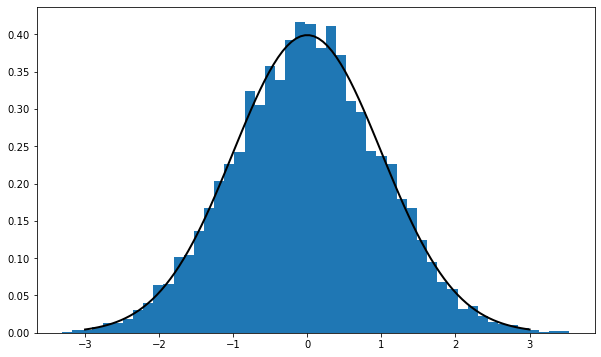

In [88]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

q = norm(loc=0,scale=1)     # normal distribution with mean = loc, std = scale
obs = q.rvs(10000)          # 10,000 observations
grid = np.linspace(q.mean()-3*q.std(), q.mean()+3*q.std(), 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=50, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

The object `q` that represents the distribution has additional useful methods, including

In [89]:
q.cdf(0.5)      # Cumulative distribution function

0.6914624612740131

In [90]:
q.ppf(0.5)      # Quantile (inverse cdf) function

0.0

In [91]:
q.mean()

0.0

In [92]:
q.std()

1.0

For all methods bundled with normal distributions, refer to [this document](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). 

The general syntax for creating these objects that represent distributions (of type `rv_frozen`) is

> `name = scipy.stats.distribution_name(shape_parameters, loc=c, scale=d)`


Here `distribution_name` is one of the distribution names in [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html).

The `loc` and `scale` parameters transform the original random variable
$ X $ into $ Y = c + d X $.

### Other Goodies in scipy.stats

There are a variety of statistical functions in `scipy.stats`.

For example, `scipy.stats.linregress` implements simple linear regression

In [93]:
from scipy.stats import linregress

n=1000
x = np.random.randn(n)
y = 2 * x + 0.1 * np.random.randn(n)
r = linregress(x, y)
r.slope, r.intercept, r.rvalue, r.pvalue, r.stderr


(1.9980902116782893,
 0.003961678485538939,
 0.9987918889123992,
 0.0,
 0.0031118025981548406)

## Roots and Fixed Points

A **root** or **zero** of a real function $ f $ on $ [a,b] $ is an $ x \in [a, b] $ such that $ f(x)=0 $.

For example, if we plot the function


<a id='equation-root-f'></a>
$$
f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1 \tag{2}
$$

with $ x \in [0,1] $ we get

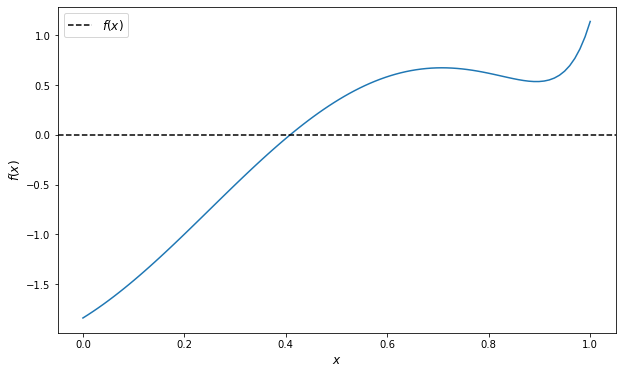

In [94]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.axhline(y=0., ls='--', c='k', label='$f(x)$')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)
ax.legend(fontsize=12)
plt.show()

The unique root is approximately 0.408.

Let’s consider some numerical techniques for finding roots.

### Bisection


<a id='index-6'></a>
One of the most common algorithms for numerical root-finding is *bisection*.

To understand the idea, recall the well-known game where

- Player A thinks of a secret number between 1 and 100  
- Player B asks if it’s less than 50  
  - If yes, B asks if it’s less than 25  
  - If no, B asks if it’s less than 75  


And so on.

This is bisection.

Here’s a simplistic implementation of the algorithm in Python.

It works for all sufficiently well behaved increasing continuous functions with $ f(a) < 0 < f(b) $


<a id='bisect-func'></a>

In [95]:
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        if f(middle) > 0:   # root is between lower and middle
            lower, upper = lower, middle
        else:               # root is between middle and upper
            lower, upper = middle, upper

    return 0.5 * (upper + lower)

Let’s test it using the function $ f $ defined in [(11.2)](#equation-root-f)

In [96]:
bisect(f, 0, 1)

0.408294677734375

Not surprisingly, SciPy provides its own bisection function.

Let’s test it using the same function $ f $ defined in [(11.2)](#equation-root-f)

In [97]:
from scipy.optimize import bisect

bisect(f, 0, 1)

0.4082935042806639

### The Newton-Raphson Method


<a id='index-8'></a>
Another very common root-finding algorithm is the [Newton-Raphson method](https://en.wikipedia.org/wiki/Newton%27s_method).

In SciPy this algorithm is implemented by `scipy.optimize.newton`.

Unlike bisection, the Newton-Raphson method uses local slope information in an attempt to increase the speed of convergence.

Let’s investigate this using the same function $ f $ defined above.

With a suitable initial condition for the search we get convergence:

In [98]:
from scipy.optimize import newton

newton(f, 0.2)   # Start the search at initial condition x = 0.2

0.40829350427935673

But other initial conditions lead to failure of convergence:

In [99]:
newton(f, 0.7)   # Start the search at x = 0.7 instead

0.7001700000000279

### Hybrid Methods

A general principle of numerical methods is as follows:

- If you have specific knowledge about a given problem, you might be able to exploit it to generate efficiency.  
- If not, then the choice of algorithm involves a trade-off between speed and robustness.  


In practice, most default algorithms for root-finding, optimization and fixed points use *hybrid* methods.

These methods typically combine a fast method with a robust method in the following manner:

1. Attempt to use a fast method  
1. Check diagnostics  
1. If diagnostics are bad, then switch to a more robust algorithm  


In `scipy.optimize`, the function `brentq` is such a hybrid method and a good default

In [100]:
from scipy.optimize import brentq

brentq(f, 0, 1)

0.40829350427936706

Here the correct solution is found and the speed is better than bisection:

In [101]:
%timeit brentq(f, 0, 1)

15.5 µs ± 179 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [102]:
%timeit bisect(f, 0, 1)

58.9 µs ± 413 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Multivariate Root-Finding


<a id='index-9'></a>
Use `scipy.optimize.fsolve`, a wrapper for a hybrid method in MINPACK.

See the [documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) for details.

### Fixed Points

A **fixed point** of a real function $ f $ on $ [a,b] $ is an $ x \in [a, b] $ such that $ f(x)=x $.


<a id='index-10'></a>
SciPy has a function for finding (scalar) fixed points too

In [103]:
from scipy.optimize import fixed_point

fixed_point(lambda x: x**2, 10.0)  # 10.0 is an initial guess

array(1.)

If you don’t get good results, you can always switch back to the `brentq` root finder, since
the fixed point of a function $ f $ is the root of $ g(x) := x - f(x) $.

## Optimization


<a id='index-12'></a>
Most numerical packages provide only functions for *minimization*.

Maximization can be performed by recalling that the maximizer of a function $ f $ on domain $ D $ is
the minimizer of $ -f $ on $ D $.

Minimization is closely related to root-finding: For smooth functions, interior optima correspond to roots of the first derivative.

The speed/robustness trade-off described above is present with numerical optimization too.

Unless you have some prior information you can exploit, it’s usually best to use hybrid methods.

For constrained, univariate (i.e., scalar) minimization, a good hybrid option is `fminbound`

In [104]:
from scipy.optimize import fminbound

fminbound(lambda x: x**2, -1, 2)  # Search in [-1, 2]

0.0

### Multivariate Optimization


<a id='index-13'></a>
Multivariate local optimizers include `minimize`, `fmin`, `fmin_powell`, `fmin_cg`, `fmin_bfgs`, and `fmin_ncg`.

Constrained multivariate local optimizers include `fmin_l_bfgs_b`, `fmin_tnc`, `fmin_cobyla`.

See the [documentation](http://docs.scipy.org/doc/scipy/reference/optimize.html) for details.

## Integration


<a id='index-15'></a>
Most numerical integration methods work by computing the integral of an approximating polynomial.

The resulting error depends on how well the polynomial fits the integrand, which in turn depends on how “regular” the integrand is.

In SciPy, the relevant module for numerical integration is `scipy.integrate`.

A good default for univariate integration is `quad`

In [105]:
from scipy.integrate import quad

integral, error = quad(lambda x: x**2, 0, 1)
integral

0.33333333333333337

In fact, `quad` is an interface to a very standard numerical integration routine in the Fortran library QUADPACK.

It uses [Clenshaw-Curtis quadrature](https://en.wikipedia.org/wiki/Clenshaw-Curtis_quadrature),  based on expansion in terms of Chebychev polynomials.

There are other options for univariate integration—a useful one is `fixed_quad`, which is fast and hence works well inside `for` loops.

There are also functions for multivariate integration.

See the [documentation](http://docs.scipy.org/doc/scipy/reference/integrate.html) for more details.

## Linear Algebra


<a id='index-17'></a>
We saw that NumPy provides a module for linear algebra called `linalg`.

SciPy also provides a module for linear algebra with the same name.

The latter is not an exact superset of the former, but overall it has more functionality.

We leave you to investigate the [set of available routines](http://docs.scipy.org/doc/scipy/reference/linalg.html).

# Matplotlib


<a id='index-1'></a>

We’ve already generated quite a few figures in these lectures using [Matplotlib](http://matplotlib.org/).

Matplotlib is an outstanding graphics library, designed for scientific computing, with

- high-quality 2D and 3D plots  
- output in all the usual formats (PDF, PNG, etc.)  
- LaTeX integration  
- fine-grained control over all aspects of presentation  
- animation, etc.  

### The Object-Oriented API


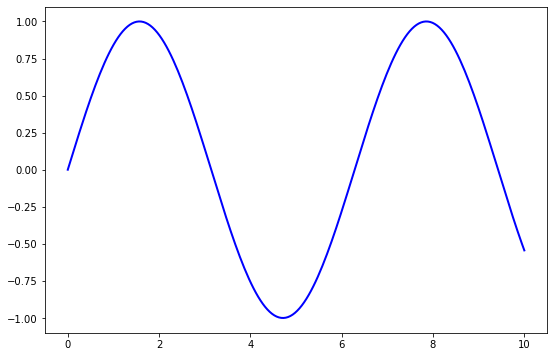

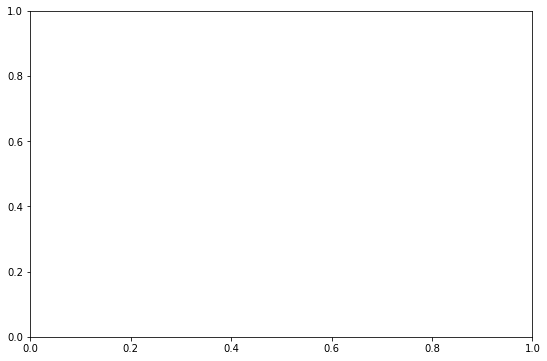

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 6) #set default figure size
import numpy as np

x = np.linspace(0, 10, 200)
y = np.sin(x)

# simple but limited functionality
plt.plot(x, y, 'b-', linewidth=2)
plt.show()

# more preferred OOP style handling of figures 
fig, ax = plt.subplots()
#ax.plot(x, y, 'r-', linewidth=2)
#plt.show()

Here the call `fig, ax = plt.subplots()` returns a pair, where

- `fig` is a `Figure` instance—like a blank canvas.  
- `ax` is an `AxesSubplot` instance—think of a frame for plotting in.  


The `plot()` function is actually a method of `ax`.


### Configuring the Plot

Below we add more features to the figure.

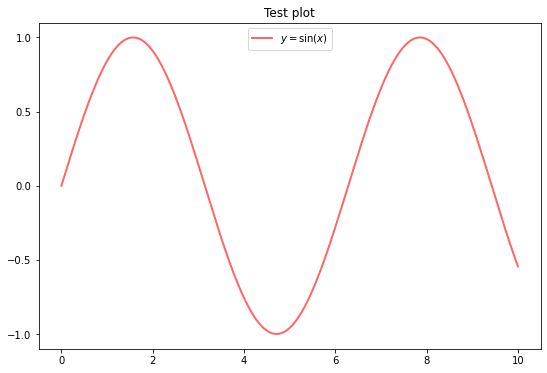

In [136]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_title('Test plot')

plt.show()

- `ax.legend(loc='upper center')`: legend at the upper center of the figure
- `label='$y=\sin(x)$'`: label with LaTeX
- `alpha=0.6`: to make the line slightly transparent
- `ax.set_yticks([-1, -0.5, 0, 0.5, 1])`: ticks on vertical axis
- `ax.set_title('Test plot')`: add title to the figure.

## More Features

Matplotlib has a huge array of functions and features, which you can discover
over time as you have need for them.


### Multiple Plots on One Axis


<a id='index-3'></a>
It’s straightforward to generate multiple plots on the same axes.

Here’s an example that randomly generates three normal densities and adds a label with their means.

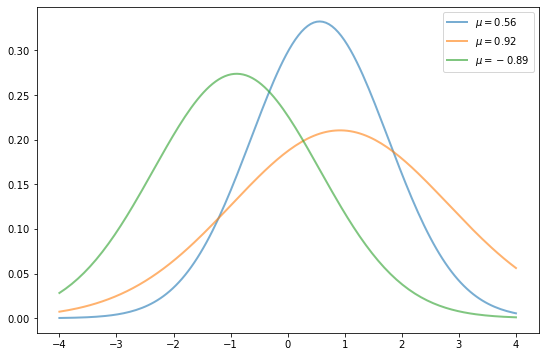

In [108]:
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

### Multiple Subplots


<a id='index-4'></a>
Sometimes we want multiple subplots in one figure.

Here’s an example that generates 6 histograms

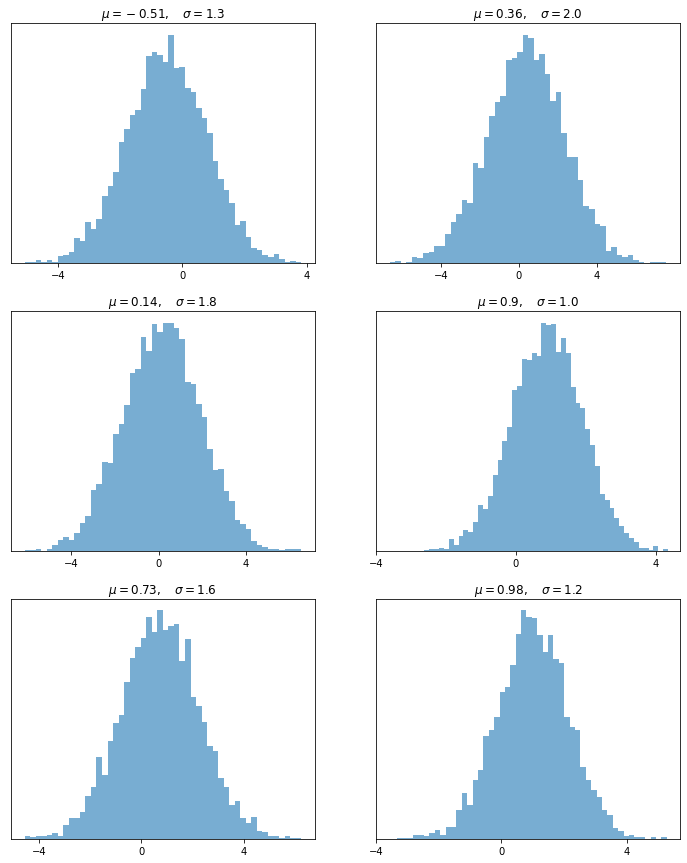

In [138]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 15))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=5000)
        axes[i, j].hist(x, alpha=0.6, bins=50)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])
plt.show()

### 3D Plots


<a id='index-5'></a>
Matplotlib does a nice job of 3D plots — here is one example

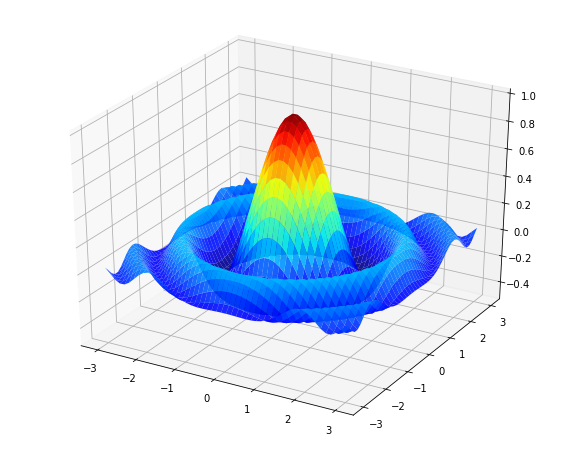

In [156]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=1, cstride=1,
                cmap=cm.jet,
                alpha=0.9)
ax.set_zlim(-0.5, 1.0)
plt.show()

### A Customizing Function

Perhaps you will find a set of customizations that you regularly use.

Suppose we usually prefer our axes to go through the origin, and to have a grid.

Here’s a nice example from [Matthew Doty](https://github.com/xcthulhu) of how the object-oriented API can be used to build a custom `subplots` function that implements these changes.

Read carefully through the code and see if you can follow what’s going on

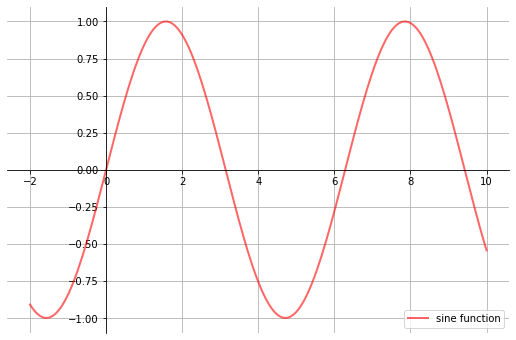

In [111]:
def subplots():
    "Custom subplots with axes through the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.grid()
    return fig, ax


fig, ax = subplots()  # Call the local version, not plt.subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()

The custom `subplots` function

1. calls the standard `plt.subplots` function internally to generate the `fig, ax` pair,  
1. makes the desired customizations to `ax`, and  
1. passes the `fig, ax` pair back to the calling code.  

## Further Reading

- The [Matplotlib gallery](http://matplotlib.org/gallery.html) provides many examples.  
- A nice [Matplotlib tutorial](http://scipy-lectures.org/intro/matplotlib/index.html) by Nicolas Rougier, Mike Muller and Gael Varoquaux.  
- [mpltools](http://tonysyu.github.io/mpltools/index.html) allows easy
  switching between plot styles.  
- [Seaborn](https://github.com/mwaskom/seaborn) facilitates common statistics plots in Matplotlib.  

### Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

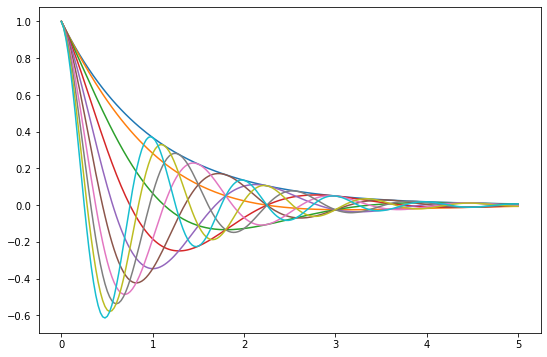

In [112]:
def f(x, θ):
    return np.cos(np.pi * θ * x ) * np.exp(- x)

θ_vals = np.linspace(0, 2, 10)
x = np.linspace(0, 5, 200)
fig, ax = plt.subplots()

for θ in θ_vals:
    ax.plot(x, f(x, θ))

plt.show()